<a href="https://colab.research.google.com/github/Chirag-Tanksali/CV-Resume-Analysis-using-Python/blob/main/CV_Resume_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

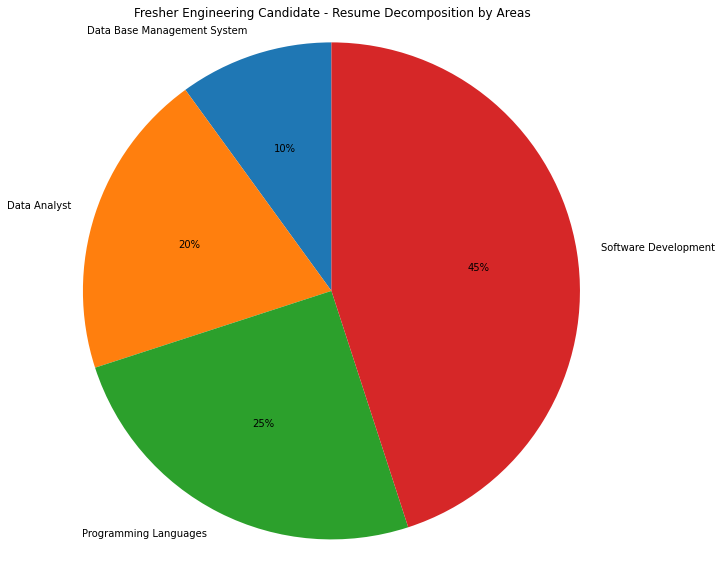

In [ ]:
# Import required libraries
import PyPDF2
import matplotlib
import textract
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Open pdf file
pdfFileObj = open('/content/CHIRAG_RESUME (1).pdf','rb')

# Read file
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

# Get total number of pages
num_pages = pdfReader.numPages

# Initialize a count for the number of pages
count = 0

# Initialize a text empty string variable
text = ""

# Extract text from every page on the file
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
    
# Convert all strings to lowercase
text = text.lower()

# Remove numbers
text = re.sub(r'\d+','',text)

# Remove punctuation
text = text.translate(str.maketrans('','',string.punctuation))

# Create dictionary with industrial and system engineering key terms by area
terms = { 'Programming Languages':['c','c++','python','java','embedded c','r',
                              'swift', 'c#','javascript','dart','matlab','kotlin'],
         
        'Software Development':['web development','android development','frontend development','backend development','html','css',
                                     'javascript','reactjs','nodejs','expressjs','angularjs','django','ruby','vuejs','nextjs','flask',
                                 'jquery','bootstrap','flutter','react native','xamarin','swiftic','ionic','jQuery mobile','php'],
         
        'Data Analyst':['tensorFlow','scikit-learn','keras','pytorch','pandas','matplotlib','numpy','seaborn','spacy',
                        'natural language toolkit','nltk','scipy','analytics','api','aws','big data','business intelligence','clustering',
                        'data mining','machine learning','deep learning','hadoop',
                        'hypothesis test','internet','nlp','modeling',
                        'predictive','r','tableau','prediction',
                        'visualuzation'],
         
        'Data Base Management System':['oracle','postgresql','microsoft sql server','couchdb','database management system','mysql','mongodb']}
         
        

# Initialize score counters for each area
l=0
sd= 0
ds = 0
dbms = 0



# Create an empty list where the scores will be stored
scores = []

# Obtain the scores for each area
for area in terms.keys():
    if area == 'Programming Languages':
        for word in terms[area]:
            if word in text:
                l +=1
        scores.append(l)

    if area == 'Software Development':
        for word in terms[area]:
            if word in text:
                sd +=1
        scores.append(sd)
        
    elif area == 'Data Analyst':
        for word in terms[area]:
            if word in text:
                ds +=1
        scores.append(ds)
        
    elif area == 'Data Base Management System':
        for word in terms[area]:
            if word in text:
                dbms +=1
        scores.append(dbms)
        

# Create a data frame with the scores summary
summary = pd.DataFrame(scores,index=terms.keys(),columns=['score']).sort_values(by='score',ascending=True)
summary

# Create pie chart visualization
pie = plt.figure(figsize=(10,10))
plt.pie(summary['score'], labels=summary.index, explode = (0,0,0,0), autopct='%1.0f%%',shadow=False,startangle=90)
plt.title('Fresher Engineering Candidate - Resume Decomposition by Areas')
plt.axis('equal')
plt.show()

# Save pie chart as a .png file
pie.savefig('resume_screening_results.png')